### CHURN PREDICTION BY YASHASVI VERMA

AIM - Developing a model for predicting customer churn at a fictitious wireless telecom company and use insights from the model to develop anincentive plan for enticing would be churners to remain with company

DESCRIPTION - The data are a scaled down version of the full databas
e generously donated by an
anonymous wireless telephone company.
There are still 7043 customers in the database, and 20 potential predictors.
Candidates can use whatever method they wish to develop their machine learning model.
The data are available in
one data file with 7043 rows that combines the calibration and
validation customers. “calibration” database consisting of
4000
customers and a
“validation” database consisting of
3043
customers.
Each database contained (1) a “churn” variable signifying w
hether the customer had left
the company two months after observation, and (2) a set of 20 potential predictor
variables that could be used in a predictive churn model.
Following usual model development procedures, the model would be estimated on the
cali
bration data and tested on the validation data.
This case requires both statistical analysis and creativity/judgment. I recommend you
spend
much time on both fine
-
tuning and interpreting
results of
your
machine learning
model

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds= pd.read_csv('C:\\Datasets\\Churn.csv')

### Analyzing Data

In [3]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values in the data, the data is complete

HOW MANY CUSTOMERS HAVE CHURNED?

In [5]:
ds['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

CHURN BASED ON MONTHLY CHARGES

In [6]:
monthlycharges = ds.groupby(['Churn'])['MonthlyCharges'].mean()
monthlycharges

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

For the people who have churned, their monthly charges were more compared to the people who have not churned

CHURNED BASED ON GENDER

<AxesSubplot:xlabel='gender'>

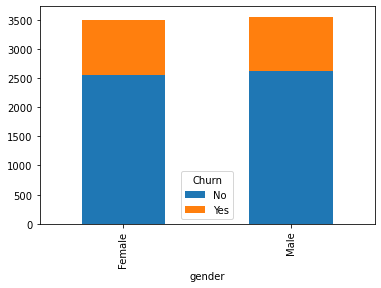

In [7]:
pd.crosstab(ds['gender'], ds['Churn']).plot(kind='bar', stacked=True)

The number of males and females that have churned are almost the same

CHURN BASED ON PHONE SERVICES

<AxesSubplot:xlabel='Churn'>

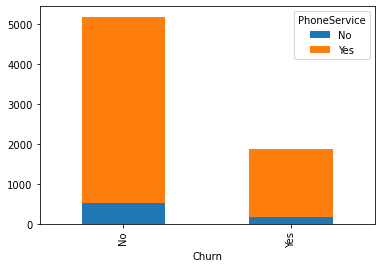

In [8]:
pd.crosstab( ds['Churn'],ds['PhoneService']).plot(kind='bar', stacked=True)

In [9]:
(pd.crosstab(ds['PhoneService'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


BASED ON IF THE PERSON IS SENIOR CITIZEN OR NOT

Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


<AxesSubplot:xlabel='SeniorCitizen'>

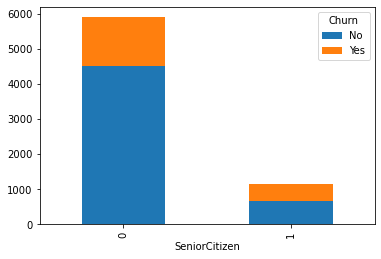

In [10]:
print(pd.crosstab(ds['SeniorCitizen'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab( ds['SeniorCitizen'], ds['Churn']).plot(kind='bar', stacked=True)

If the person is a senior citizen the probablity of churn is almost 40%

BASED ON PARTNER

Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


<AxesSubplot:xlabel='Partner'>

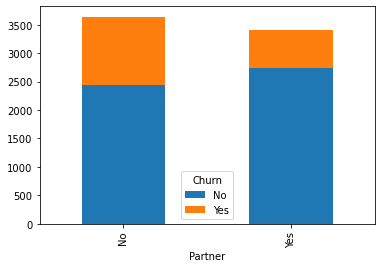

In [11]:
print(pd.crosstab(ds['Partner'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab( ds['Partner'], ds['Churn']).plot(kind='bar', stacked=True)

This doesn't affects the churn value very much, but if the person is a partner the probablity of churning is little less

BASED ON DEPENDENTS

Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


<AxesSubplot:xlabel='Dependents'>

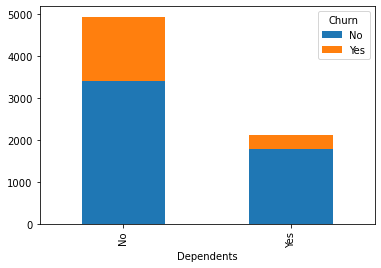

In [12]:
print(pd.crosstab(ds['Dependents'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab( ds['Dependents'], ds['Churn']).plot(kind='bar', stacked=True)

The probability of churn when the person is dependent is lower comparatively 

BASED ON TENURE

In [13]:
ds['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tenure_group', ylabel='count'>

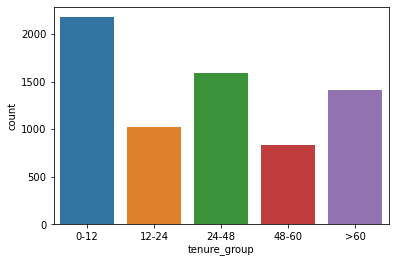

In [14]:
dsnew = ds.copy()
bins=[0,12,24,48,60,100]
dsnew['tenure_group']=pd.cut(dsnew['tenure'],bins,labels=['0-12','12-24','24-48','48-60','>60'])
sns.countplot(dsnew['tenure_group'])

In [15]:
print(pd.crosstab(dsnew['tenure_group'], dsnew['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn               No       Yes
tenure_group                    
0-12          0.523218  0.476782
12-24         0.712891  0.287109
24-48         0.796110  0.203890
48-60         0.855769  0.144231
>60           0.933902  0.066098


Customer count with respect to tenure:   
Max in range 0-12     
Min in range 48-60  

Least churn rate is for above 60 tenure     
Most churn rate is between 48-60 tenure

BASED ON MULTIPLE LINES

Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


<AxesSubplot:xlabel='MultipleLines'>

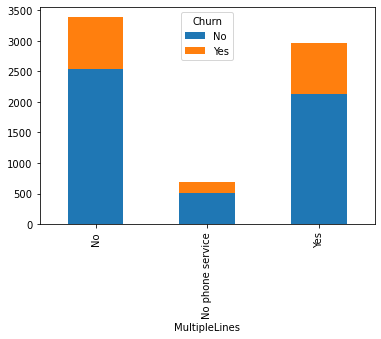

In [16]:
print(pd.crosstab(ds['MultipleLines'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab( ds['MultipleLines'], ds['Churn']).plot(kind='bar', stacked=True)

Churn value is almost same for all the possibilities

BASED ON INTERNET SERVICE

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


<AxesSubplot:xlabel='InternetService'>

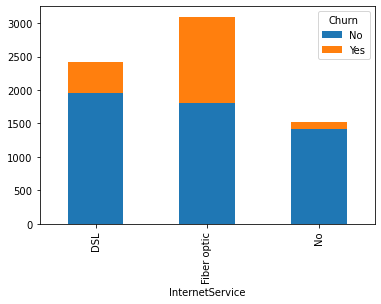

In [17]:
print(pd.crosstab(ds['InternetService'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab( ds['InternetService'], ds['Churn']).plot(kind='bar', stacked=True)

Most users belong to the 'Fiber optic' group only and there is 41% probability of Churn for the same      
Churn value is most in terms of percentage and numbers for 'Fibre Optic' and least for 'No'

BASED ON ONLINE SECURITY

Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


<AxesSubplot:xlabel='OnlineSecurity'>

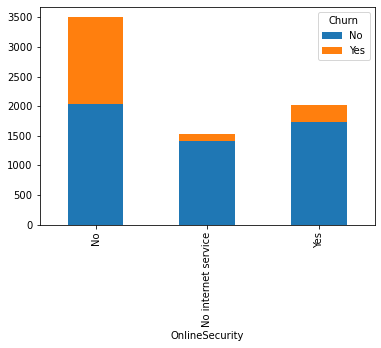

In [18]:
print(pd.crosstab(ds['OnlineSecurity'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab( ds['OnlineSecurity'], ds['Churn']).plot(kind='bar', stacked=True)

If there is no Online Security the churn value pecentage is 41.76% and where there is online security the churn value is 14.6%

BASED ON ONLINE BACKUP

In [19]:
(pd.crosstab(ds['OnlineBackup'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
OnlineBackup,,
No,0.600712,0.399288
No internet service,0.925950,0.074050
Yes,0.784685,0.215315


Where there is no online backup the churn value is almost double compared to where there is backup

BASED ON DEVICE PROTECTION

In [20]:
(pd.crosstab(ds['DeviceProtection'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
DeviceProtection,,
No,0.608724,0.391276
No internet service,0.925950,0.074050
Yes,0.774979,0.225021


Where there is no device protection the churn value is almost double compared to where there is device protection

BASED ON TECH SUPPORT

In [21]:
(pd.crosstab(ds['TechSupport'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
TechSupport,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663


Where the tech support is not available the churn value is 41% which is very high

BASED ON STREAMING TV

In [22]:
(pd.crosstab(ds['StreamingTV'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
StreamingTV,,
No,0.664769,0.335231
No internet service,0.925950,0.074050
Yes,0.699298,0.300702


There is not much difference in churn percentage based on streaming TV

BASED ON STREAMING MOVIES

In [23]:
(pd.crosstab(ds['StreamingMovies'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
StreamingMovies,,
No,0.663196,0.336804
No internet service,0.925950,0.074050
Yes,0.700586,0.299414


There is not much difference in churn percentage based on streaming Movies

BASED ON CONTRACT

In [24]:
(pd.crosstab(ds['Contract'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


<AxesSubplot:xlabel='Contract'>

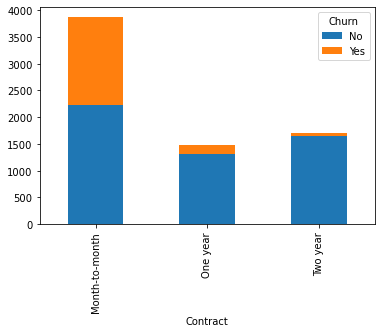

In [25]:
pd.crosstab( ds['Contract'], ds['Churn']).plot(kind='bar', stacked=True)

For month-to-month contract the difference in percentage of churn is low    
For one year contract the difference is very high, churn percentage is 11% and not churn is 88%       
For Two year contract the difference is higher, churn is 2.8% and not churn is 97% 
     
-------- Which shows that the higher the duration of contract the lower the chances for Churn----

BASED ON PAPERLESS BILLING

In [26]:
(pd.crosstab(ds['PaperlessBilling'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


The churn value based on paperless billing is high      
16% in case of paper billing            
33.5% in case of paperless billing

BASED ON PAYMENT METHOD

In [27]:
(pd.crosstab(ds['PaymentMethod'], ds['Churn']).apply(lambda r: r/r.sum(), axis=1))

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


<AxesSubplot:xlabel='PaymentMethod'>

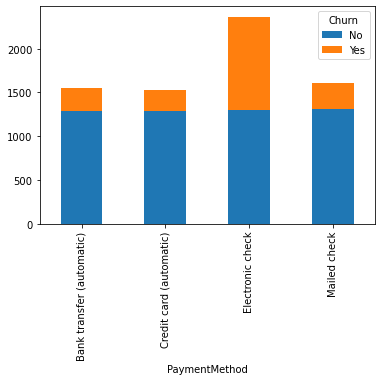

In [28]:
pd.crosstab( ds['PaymentMethod'], ds['Churn']).plot(kind='bar', stacked=True)

Pobability of churn is higher in Electronic check medium and almost same in other three.

BASED ON MONTHLY CHARGES AND TOTAL CHARGES

Converting Total charges from object to integer values

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
LE = LabelEncoder()

In [31]:
ds['TotalChargesnew']=LE.fit_transform(ds['TotalCharges'])

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


[<AxesSubplot:ylabel='MonthlyCharges'>
 <AxesSubplot:ylabel='TotalChargesnew'>]


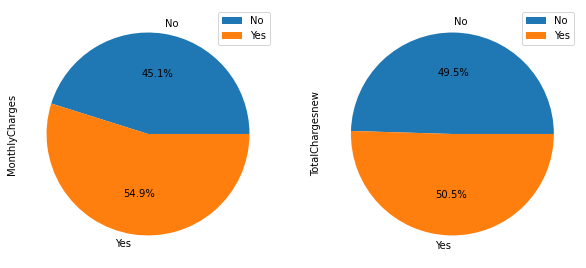

In [32]:
Monthlycharges = ds.groupby(['Churn'])['MonthlyCharges','TotalChargesnew'].mean()
print(Monthlycharges.plot.pie(subplots=True, figsize = (10,10), autopct='%1.1f%%', labels = Monthlycharges.index))

Values distribution in monthly charges

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='monthly', ylabel='count'>

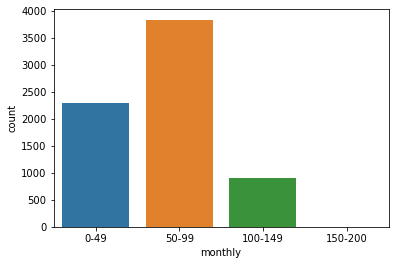

In [33]:
mon = ds.copy()
bins=[0,50,100,150,200]
mon['monthly']=pd.cut(mon['MonthlyCharges'],bins,labels=['0-49','50-99','100-149','150-200'])
sns.countplot(mon['monthly'])

value distribuition in total charges

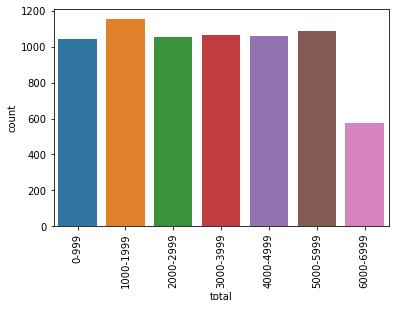

In [34]:
bins=[0,1000,2000,3000,4000,5000,6000,7000]
mon['total']=pd.cut(mon['TotalChargesnew'],bins,labels=['0-999','1000-1999','2000-2999','3000-3999', '4000-4999', '5000-5999','6000-6999'])
sns.countplot(mon['total'])
plt.xticks(rotation = 90)
plt.show()

Churn          No       Yes
monthly                    
0-49     0.842975  0.157025
50-99    0.673347  0.326653
100-149  0.719512  0.280488


<AxesSubplot:xlabel='monthly'>

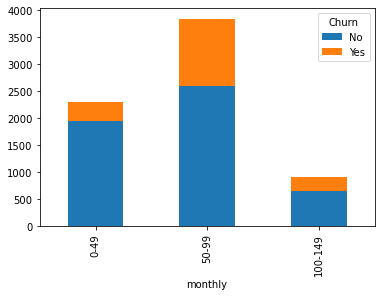

In [35]:
print(pd.crosstab(mon['monthly'], mon['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab(mon['monthly'], mon['Churn']).plot(kind='bar', stacked=True)

Churn            No       Yes
total                        
0-999      0.747126  0.252874
1000-1999  0.724437  0.275563
2000-2999  0.701804  0.298196
3000-3999  0.766197  0.233803
4000-4999  0.787133  0.212867
5000-5999  0.707182  0.292818
6000-6999  0.684119  0.315881


<AxesSubplot:xlabel='total'>

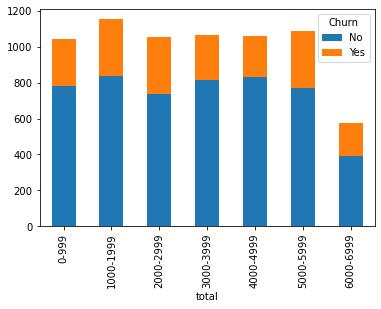

In [36]:
print(pd.crosstab(mon['total'], mon['Churn']).apply(lambda r: r/r.sum(), axis=1))
pd.crosstab(mon['total'], mon['Churn']).plot(kind='bar', stacked=True)

For monthly charges --       
Churn value is high for charges between 50-99 and then 100-150     
      
For total charges --       
Churn value is highest for charges above 6000 and second higest for charges between 2000-2999 and 5000-5999

### Conversion

Converting into categorical values using label encoder 

In [37]:
ds['gender']=LE.fit_transform(ds['gender'])
ds['Partner']=LE.fit_transform(ds['Partner'])
ds['PhoneService']=LE.fit_transform(ds['PhoneService'])
ds['MultipleLines']=LE.fit_transform(ds['MultipleLines'])
ds['OnlineBackup']=LE.fit_transform(ds['OnlineBackup'])
ds['PaperlessBilling']=LE.fit_transform(ds['PaperlessBilling'])
ds['Contract']=LE.fit_transform(ds['Contract'])
ds['DeviceProtection']=LE.fit_transform(ds['DeviceProtection'])
ds['SeniorCitizen']=LE.fit_transform(ds['SeniorCitizen'])
ds['Dependents']=LE.fit_transform(ds['Dependents'])
ds['TechSupport']=LE.fit_transform(ds['TechSupport'])
ds['InternetService']=LE.fit_transform(ds['InternetService'])
ds['OnlineSecurity']=LE.fit_transform(ds['OnlineSecurity'])
ds['PaymentMethod']=LE.fit_transform(ds['PaymentMethod'])
ds['Churnval']=LE.fit_transform(ds['Churn'])

### Checking Outliers

<AxesSubplot:>

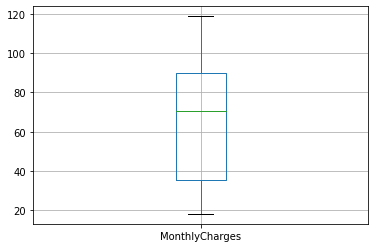

In [38]:
ds.boxplot(column = ['MonthlyCharges'])

NO OUTLIERS!!!

<AxesSubplot:>

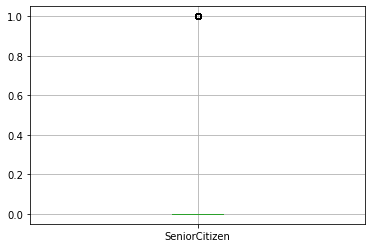

In [39]:
ds.boxplot(column= ['SeniorCitizen'])

Removing Outliers from here

In [40]:
ds = ds[ds['SeniorCitizen']<1.0]

<AxesSubplot:>

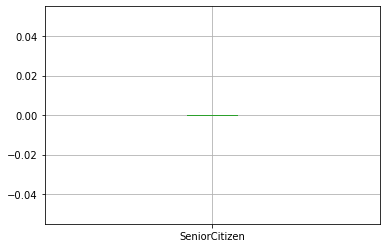

In [41]:
ds.boxplot(column= ['SeniorCitizen'])

### Training machine learning model

The Data is now clean and the next step is to train and test the model

In [42]:
X = ds[['SeniorCitizen', 'Partner','Dependents','tenure','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','Contract', 'PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalChargesnew' ]].values
Y = ds[['Churnval']].values

In [43]:
X

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.5050e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.4660e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.5700e+02],
       ...,
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0320e+02,
        5.6980e+03],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        2.9940e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        5.4070e+03]])

In [44]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [47]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4720, 14), (1181, 14), (4720, 1), (1181, 1))

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
LR = LogisticRegression()

In [50]:
LR.fit(X_train, Y_train)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [51]:
LR.intercept_

array([-0.53053441])

In [52]:
LR.coef_

array([[ 0.00000000e+00, -2.14392488e-02, -2.55273739e-01,
        -3.24270245e-02,  6.72807178e-02, -4.27658413e-01,
        -6.61210449e-02,  8.17560008e-02, -3.35530043e-01,
        -7.42389814e-01,  3.22341679e-01, -1.51081725e-01,
         1.72809257e-02,  9.29620196e-06]])

In [53]:
Y_pred = LR.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(Y_pred, Y_test)

0.8230313293818797

The accuracy we are getting using Logistic Regression is 80.7%

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
KN = KNeighborsClassifier()

In [58]:
KN.fit(X_train, Y_train)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [59]:
Y_pred = KN.predict(X_test)

# OBSERVATIONS AND CONCLUSIONS

The variables selected for training and testing the model:     

Values that made no difference or very less difference to Churn are -   
1)Gender            
2)PhoneServices          
3)MultipleLines         
4)StreamingTV         
5)StreamingMovies       
         
Values that did affected the churn value by less to medium rate are -       
1)Partner          
2)Dependent          
3)Online backup           
4)Device protection       
5)Paperless billing       
6)Total Charges         
          
Values that affected the churnvalue the most      
1)Senior citizen      
2)Tenure rate          
3)Internet service        
4)Online security       
5)Tech support        
6)contract       
7)Monthly charges         
8)Payment method

-----> The variables chosen to train the model are dependent on the % of effect it does to the churn value    
     
-----> The variables which affects it the most are taken but the variables which has medium impact are also taken for better accuracy of the model 

------> Performance of the model - Accuracy of the model is 80%

The offers that can be made to the customer are -   
1) Better plans for monthly charges as both tenure and montly charges are important factors        
2) Better internet sevices for fiber optic cables as they are the most used and most affected too    
3) Online security and better Tech support by the team     
4) Month to month contract must be convienced to extended     

### Testing the model

From all the above observations and analysis of data we must know how the model works so now we will test the model

VARIABLES - 'SeniorCitizen', 'Partner','Dependents','tenure','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','Contract', 'PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalChargesnew'

In [61]:
new_input = [['0', '1', '1','9','0','1','0','1','1','1','0','1','65','6000']]

In [62]:
new_output = KN.predict(new_input)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


In [63]:
ds.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesnew,Churnval
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,No,No,0,1,2,29.85,29.85,No,2505,0


In [67]:
print('Churn prediction: The customer will churn or not\n1 = Churn and 0 = Not Churn\nResult - ' ,new_output)

Churn prediction: The customer will churn or not
1 = Churn and 0 = Not Churn
Result -  [0]


------------------------------------------------------------------------END-------------------------------------------------------------------------------